In [ ]:
#Madjid Tehrani
#Cybersec-DMS (DMS GmbH)
#https://www.cybersec-dms.com/
# Copyright © 2023, DMS GmbH. All rights reserved. Permission is hereby granted, free of charge, to any person obtaining a copy of this
# software and associated documentation files (the "Software"), for academic research purposes, subject to the following conditions:
# the above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

In [ ]:
!pip install pyquil
!pip install qiskit
!pip install -U azure-quantum
!pip install -U azure-quantum[qiskit]
!pip install qiskit-machine-learning
!pip install pylatexenc
!pip install scikit-multiflow

In [ ]:
# To facilitate academic review, the associated dataset has been made freely accessible via the data container provided below.
!wget https://dgadata.blob.core.windows.net/dga/BotnetDgaDataset_5000_newMethod.csv

--2023-07-25 07:57:11--  https://dgadata.blob.core.windows.net/dga/BotnetDgaDataset_5000_newMethod.csv
Resolving dgadata.blob.core.windows.net (dgadata.blob.core.windows.net)... 20.60.2.68
Connecting to dgadata.blob.core.windows.net (dgadata.blob.core.windows.net)|20.60.2.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379327 (370K) [text/csv]
Saving to: ‘BotnetDgaDataset_5000_newMethod.csv’

BotnetDgaDataset_50 100%[===================>] 370.44K   723KB/s    in 0.5s    

2023-07-25 07:57:12 (723 KB/s) - ‘BotnetDgaDataset_5000_newMethod.csv’ saved [379327/379327]



In [ ]:
#Install Docker
#Install Rigetti QVM:https://hub.docker.com/r/rigetti/quilc
#See details from here: https://docs.rigetti.com/qcs/getting-started/forest-docker-image
#run in CMD

docker run --rm -it -p 5000:5000 rigetti/qvm -S


In [ ]:
#Test if you can use QVM
from pyquil import Program, get_qc
from pyquil.gates import RZ, H
from pyquil.api import WavefunctionSimulator
import numpy as np
from scipy.linalg import svdvals

# ZFeatureMap function
def z_feature_map(data):
    # Create an empty quantum program
    program = Program()
    qubits = len(data)

    # Apply a Hadamard gate to all qubits
    for q in range(qubits):
        program += H(q)

    # Apply Z rotations
    for q in range(qubits):
        program += RZ(2 * np.pi * data[q], q)

    # Apply a Hadamard gate to all qubits again
    for q in range(qubits):
        program += H(q)

    return program

# Parameters for 7 qubits
parameters = [[1],[1],[1],[1],[1],[1],[9]]

# Connect to the QVM
qc = get_qc('7q-qvm')

# Create a wavefunction simulator
wfn_sim = WavefunctionSimulator()

# Create a ZFeatureMap for each qubit with corresponding parameters
programs = [z_feature_map(param) for param in parameters]

# Get the wavefunctions for each program
wavefunctions = [wfn_sim.wavefunction(program) for program in programs]

# Compute the density matrices for each state
density_matrices = [np.outer(wf.amplitudes, np.conj(wf.amplitudes)) for wf in wavefunctions]

# Trace distance function
def trace_distance(dm1, dm2):
    diff = dm1 - dm2
    singular_values = svdvals(diff)
    return 0.5 * np.sum(np.abs(singular_values))

# Compute the trace distance for each adjacent pair of qubits and the pair of the last and the first qubit
distances = []
for i in range(d6):
    trace_distance_value = trace_distance(density_matrices[i], density_matrices[i+1])
    print(f"Trace distance between qubit {i} and {i+1}: {trace_distance_value}")
    distances.append(trace_distance_value)

trace_distance_value = trace_distance(density_matrices[6], density_matrices[0])
print(f"Trace distance between qubit {6} and {0}: {trace_distance_value}")
distances.append(trace_distance_value)

print(f"Sum of distances: {sum(distances)}")


density_matrices= [array([[ 1.00000000e+00+0.0000000e+00j, -0.00000000e+00-1.2246468e-16j],
       [-0.00000000e+00+1.2246468e-16j,  1.49975978e-32+0.0000000e+00j]]), array([[ 1.00000000e+00+0.0000000e+00j, -0.00000000e+00-1.2246468e-16j],
       [-0.00000000e+00+1.2246468e-16j,  1.49975978e-32+0.0000000e+00j]]), array([[ 1.00000000e+00+0.0000000e+00j, -0.00000000e+00-1.2246468e-16j],
       [-0.00000000e+00+1.2246468e-16j,  1.49975978e-32+0.0000000e+00j]]), array([[ 1.00000000e+00+0.0000000e+00j, -0.00000000e+00-1.2246468e-16j],
       [-0.00000000e+00+1.2246468e-16j,  1.49975978e-32+0.0000000e+00j]]), array([[ 1.00000000e+00+0.0000000e+00j, -0.00000000e+00-1.2246468e-16j],
       [-0.00000000e+00+1.2246468e-16j,  1.49975978e-32+0.0000000e+00j]]), array([[ 1.00000000e+00+0.0000000e+00j, -0.00000000e+00-1.2246468e-16j],
       [-0.00000000e+00+1.2246468e-16j,  1.49975978e-32+0.0000000e+00j]]), array([[ 1.00000000e+00+0.00000000e+00j, -0.00000000e+00-1.10218212e-15j],
       [-0.0000000

In [ ]:
#make distance function
from pyquil import Program, get_qc
from pyquil.gates import RZ, H
from pyquil.api import WavefunctionSimulator
import numpy as np
from scipy.linalg import svdvals

# ZFeatureMap function
def z_feature_map(data):
    # Create an empty quantum program
    program = Program()
    qubits = len(data)

    # Apply a Hadamard gate to all qubits
    for q in range(qubits):
        program += H(q)

    # Apply Z rotations
    for q in range(qubits):
        program += RZ(2 * np.pi * data[q], q)

    # Apply a Hadamard gate to all qubits again
    for q in range(qubits):
        program += H(q)

    return program

# Trace distance function
def trace_distance(dm1, dm2):
    diff = dm1 - dm2
    singular_values = svdvals(diff)
    return 0.5 * np.sum(np.abs(singular_values))

def QHTC_Distance_Rigetti(parameters):
    # Connect to the QVM
    qc = get_qc('7q-qvm')

    # Create a wavefunction simulator
    wfn_sim = WavefunctionSimulator()

    # Create a ZFeatureMap for each qubit with corresponding parameters
    programs = [z_feature_map(param) for param in parameters]
    # Get the wavefunctions for each program
    wavefunctions = [wfn_sim.wavefunction(program) for program in programs]

    # Compute the density matrices for each state
    density_matrices = [np.outer(wf.amplitudes, np.conj(wf.amplitudes)) for wf in wavefunctions]

    # Compute the trace distance for each adjacent pair of qubits and the pair of the last and the first qubit
    distances = []
    for i in range(6):
        trace_distance_value = trace_distance(density_matrices[i], density_matrices[i+1])
        #print(f"Trace distance between qubit {i} and {i+1}: {trace_distance_value}")
        distances.append(trace_distance_value)

    trace_distance_value = trace_distance(density_matrices[6], density_matrices[0])
    #print(f"Trace distance between qubit {6} and {0}: {trace_distance_value}")
    distances.append(trace_distance_value)

    #print(f"Sum of distances: {sum(distances)}")
    return sum(distances)
# Usage
parameters = [[1],[2],[3],[4],[5],[6],[7]]
QHTC_Distance_Rigetti(parameters)


1.4695761589768234e-15

In [ ]:
#Quantum enhanced HTC
from qiskit import execute, Aer
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap, StatePreparation
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import Statevector, state_fidelity
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap
from qiskit.quantum_info import Statevector, state_fidelity
import numpy as np
import warnings
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc
from sklearn import preprocessing
from qiskit_machine_learning.kernels import FidelityQuantumKernel, QuantumKernel

warnings.filterwarnings("ignore")

class HoeffdingTreeClassifier:
    def __init__(self, n_features, n_classes, delta=0.01, tie_threshold=0.05):
        self.n_features = n_features
        self.n_classes = n_classes
        self.delta = delta
        self.tie_threshold = tie_threshold

        # Initialize the root node of the tree
        self.root = TreeNode(self.delta)

    def predict(self, X):
        #Predict the class labels for the input instances X.
        y_pred = []
        for x in X:
            node = self.root
            while not node.is_leaf():
                if node.split_attr is None:
                    break
                feature_val = str(x[node.split_attr])
                if feature_val not in node.children:
                    break
                node = node.children[feature_val]
            y_pred.append(node.get_majority_class())
        return y_pred


    def partial_fit(self, X, y):
        #Update the tree with new training instances X and their corresponding class labels y
        n_samples = X.shape[0]
        for i in range(n_samples):
            x = X[i]
            label = y[i]
            self._update_statistics(x, label)
            self._attempt_split(self.root)



    def _update_statistics(self, x, label):
        #Update the statistics of the tree nodes based on the input instance and its class label
        node = self.root
        node.total_samples += 1

        if label not in node.class_counts:
            node.class_counts[label] = 0

        node.class_counts[label] += 1

        while node.is_split():
            attr = node.split_attr
            attr_val = str(x[attr])
            if attr_val not in node.children:
                node.children[attr_val] = TreeNode(self.delta)
            node = node.children[attr_val]
            node.total_samples += 1

            if label not in node.class_counts:
                node.class_counts[label] = 0

            node.class_counts[label] += 1


    def _attempt_split(self, node):
        #Attempt to split the given node based on the Hoeffding bound gain
        if not node.is_split():
            if node.total_samples >= 2:
                node.compute_error_rate()

            if node.total_samples >= 2 and node.error_rate > self._hoeffding_bound(node.total_samples):
                self._split_node(node)
        else:
            for child in node.children.values():
                self._attempt_split(child)

    def _split_node(self, node):
        #Split the given node by selecting the best attribute based on the Hoeffding bound gain
        node.compute_best_splitting_attribute(self.n_classes, self.n_features)

        for attr_val in node.children:
            child = node.children[attr_val]
            if child.total_samples >= 2:
                child.compute_error_rate()

            if child.total_samples < 2 or child.error_rate <= self._hoeffding_bound(child.total_samples):
                continue

            # Create a new leaf node for the child
            leaf_node = TreeNode(self.delta)
            leaf_node.label = child.get_majority_class()
            node.children[attr_val] = leaf_node

    def _hoeffding_bound(self, n):
        #Compute the Hoeffding bound for the given number of samples n
        return np.sqrt((self.n_classes * np.log(1 / self.delta)) / (2 * n))


class TreeNode:
    def __init__(self, delta):
        self.split_attr = None
        self.children = {}
        self.class_counts = {}
        self.total_samples = 0
        self.error_rate = 0.0
        self.label = None
        self.delta = delta

    def is_leaf(self):
        #Check if the node is a leaf (no children)
        return not self.children

    def is_split(self):
        #Check if the node is split (has children).
        return self.split_attr is not None

    def compute_error_rate(self):
        #Compute the error rate of the node based on the class distribution.
        total_samples = float(self.total_samples)
        error_sum = total_samples - max(self.class_counts.values())
        self.error_rate = error_sum / total_samples

    def compute_best_splitting_attribute(self, n_classes, n_features):
        #Compute the best attribute to split on based on the Hoeffding bound gain.
        best_gain = -np.inf
        best_attr = None

        for attr in range(n_features):
            class_counts_per_value = {}
            total_samples_per_value = {}

            for attr_val, child in self.children.items():
                class_counts_per_value[attr_val] = child.class_counts.get(attr_val, np.zeros(n_classes))
                total_samples_per_value[attr_val] = child.total_samples

            split_gain = self._compute_hoeffding_bound_gain(class_counts_per_value, total_samples_per_value,
                                                            n_classes, self.total_samples)

            if split_gain > best_gain:
                best_gain = split_gain
                best_attr = attr

        if best_attr is not None:
            self.split_attr = best_attr

    def _compute_hoeffding_bound_gain(self, class_counts_per_value, total_samples_per_value, n_classes, total_samples):
        #Compute the Hoeffding bound gain for the given attribute values and their class counts
        gain = 0.0

        for attr_val in class_counts_per_value:
            class_counts = class_counts_per_value[attr_val]
            total_samples_val = total_samples_per_value[attr_val]
            error_val = total_samples_val - np.max(class_counts)
            error_rate_val = error_val / total_samples_val

            gain -= total_samples_val / total_samples * self._hoeffding_bound(error_rate_val)

        return gain

    def _hoeffding_bound(self, error_rate):
        #Compute the Hoeffding bound for the given error rate
        R = 1  # Range of the target variable for binary classification
        return np.sqrt((R ** 2 * np.log(1 / self.delta)) / (2 * error_rate))

    def get_majority_class(self):
        #Get the majority class label based on the class distribution
        max_count = -np.inf
        majority_class = None

        for class_label, count in self.class_counts.items():
            if count > max_count:
                max_count = count
                majority_class = class_label

        return majority_class



def run_hoeffding_tree(data_encoding_fn, backend):
    # Load the dataset
    df = pd.read_csv('BotnetDgaDataset_5000_newMethod.csv', delimiter=',', encoding='utf-8-sig')
    data = df.to_numpy()
    # Extract the features and labels
    features = data[:, :-1]
    labels = data[:, -1]
    print("len(features)-1=",len(features)-1)
    # Normalize the features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)
    # Map the features to a quantum feature space using the provided data encoding function
    #feature_map_f = data_encoding_fn(feature_dimension=features.shape[1])

    jobcounter=0
    # Initialize lists to hold circuits and results for features and labels
    feature_results = []
    label_results = []
    feature_statevectors =[]
    label_statevectors =[]
    quantum_walksF = []

    # Iterate through both features and labels simultaneously
    for feature_row, label in zip(features, labels):
        jobcounter += 1
        feature_row_reshaped = feature_row.reshape(-1, 1)  # Fix here: use feature_row instead of data
        d=QHTC_Distance_Rigetti(feature_row_reshaped)
        print(f'Job {jobcounter} of {len(features)} has successfully run')  # Print progress
        quantum_walksF.append(d)
    print(len(quantum_walksF),len(labels))
    # Combine the quantum walks and labels
    new_data = np.column_stack([quantum_walksF, labels])
    print(new_data)
    print("now QHTC")

    # Initialize the HoeffdingTreeClassifier
    n_features = new_data.shape[1] - 1
    n_classes = len(np.unique(labels))
    htc = HoeffdingTreeClassifier(n_features, n_classes)

    # Store accuracy, increment number, and additional metrics
    accuracies = []
    incrementes = []
    roc_auc_values = []
    precisions = []
    recalls = []
    f1_scores = []
    # Store fpr, tpr, and additional metrics for each increment
    fpr_values = []
    tpr_values = []
    # Set the desired test percentage
    test_percentage = 0.2

    # Calculate the increment size based on the test percentage
    #increment_size = int(len(quantum_features) * test_percentage)
    increment_size=1000
    # Iterate over the data in incrementes
    for i in range(0, len(new_data), increment_size):
        # Split the increment into training and testing sets
        X_train = np.concatenate([new_data[:i, :-1], new_data[i+increment_size:, :-1]])
        y_train = np.concatenate([new_data[:i, -1], new_data[i+increment_size:, -1]])
        y_train = np.where(y_train == 3.0, 1.0, y_train)
        X_test = new_data[i:i+increment_size, :-1]
        y_test = new_data[i:i+increment_size, -1]
        y_test = np.where(y_test == 3.0, 1.0, y_test)

        # Train the HoeffdingTreeClassifier with the increment data
        htc.partial_fit(X_train, y_train)

        # Calculate accuracy on the test data
        test_predictions = htc.predict(X_test)
        test_accuracy = np.mean(test_predictions == y_test)

        # Calculate additional performance metrics

        fpr, tpr, _ = roc_curve(y_test, test_predictions)

        # Store fpr and tpr for the current increment
        fpr_values.append(fpr)
        tpr_values.append(tpr)

        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(y_test, test_predictions)
        f1 = f1_score(y_test, test_predictions)

        # Store accuracy, increment number, and additional metrics
        accuracies.append(test_accuracy)
        incrementes.append(i+increment_size)
        roc_auc_values.append(roc_auc)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print or store the accuracy and additional metrics as desired
        print(f"Accuracy for increment {i//increment_size + 1}: {test_accuracy}")
        print(f"AUC for increment {i//increment_size + 1}: {roc_auc}")
        print(f"F1-score for increment {i//increment_size + 1}: {f1}")

    # Get the name of the data encoding function
    encoding_name = data_encoding_fn.__name__

    # Plot accuracy vs. increment
    plt.plot(incrementes, accuracies)
    plt.xlabel('increment Size')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. increment Size ({encoding_name})')
    plt.show()

    # Plot ROC curves
    plt.figure()
    for i in range(len(fpr_values)):
        if i < len(roc_auc_values):  # Check if roc_auc_values has enough values
            roc_auc = roc_auc_values[i]
            label = f'increment {i+1} (AUC = {roc_auc:.2f})'
        else:
            label = f'increment {i+1}'
        plt.plot(fpr_values[i], tpr_values[i], label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves ({encoding_name})')
    plt.legend(loc='lower right')
    plt.show()

    # Plot precision-recall curves
    plt.figure()
    for i in range(len(incrementes)):
        plt.plot(recalls[i], precisions[i], label=f'increment {i+1}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curves ({encoding_name})')
    plt.legend(loc='lower right')
    plt.show()

    # Plot F1-score vs. increment
    plt.plot(incrementes, f1_scores)
    plt.xlabel('increment Size')
    plt.ylabel('F1-score')
    plt.title(f'F1-score vs. increment Size ({encoding_name})')
    plt.show()



len(features)-1= 5000
Job 1 of 5001 has successfully run
Job 2 of 5001 has successfully run
Job 3 of 5001 has successfully run
Job 4 of 5001 has successfully run
Job 5 of 5001 has successfully run
Job 6 of 5001 has successfully run
Job 7 of 5001 has successfully run
Job 8 of 5001 has successfully run
Job 9 of 5001 has successfully run
Job 10 of 5001 has successfully run
Job 11 of 5001 has successfully run
Job 12 of 5001 has successfully run
Job 13 of 5001 has successfully run
Job 14 of 5001 has successfully run
Job 15 of 5001 has successfully run
Job 16 of 5001 has successfully run
Job 17 of 5001 has successfully run
Job 18 of 5001 has successfully run
Job 19 of 5001 has successfully run
Job 20 of 5001 has successfully run
Job 21 of 5001 has successfully run
Job 22 of 5001 has successfully run
Job 23 of 5001 has successfully run
Job 24 of 5001 has successfully run
Job 25 of 5001 has successfully run
Job 26 of 5001 has successfully run
Job 27 of 5001 has successfully run
Job 28 of 5001 

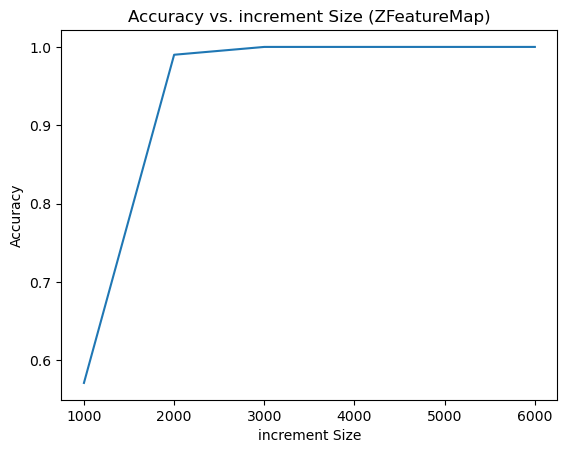

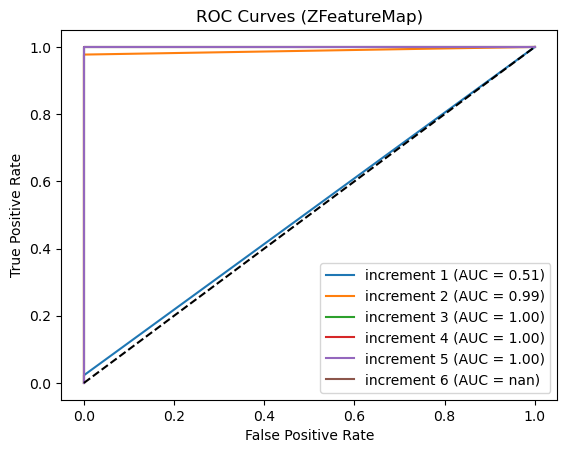

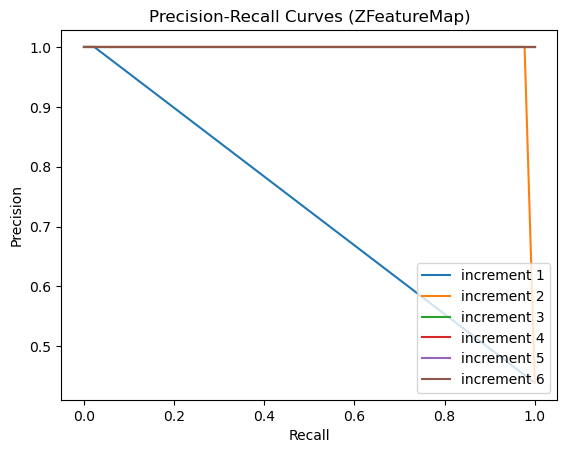

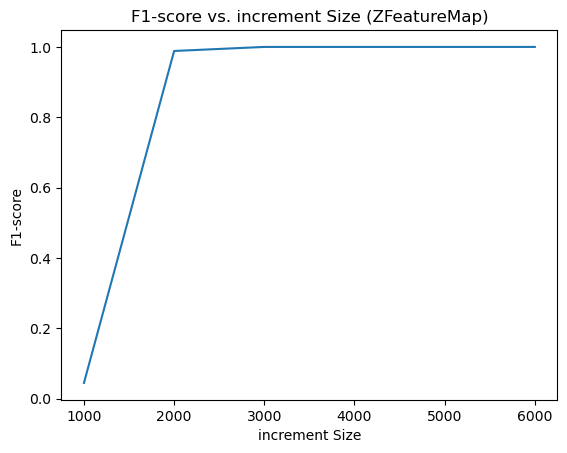

time of round= 1 1686.7267393999991


In [ ]:
#Active_Backend = rigetti_simulator_backend
#Active_Backend = Aer.get_backend('statevector_simulator')
#Active_Backend = aer_simulator
#Active_Backend = ionq_simulator_backend

# Define a list of data encoding functions
#data_encoding_functions = [ZFeatureMap, ZZFeatureMap, PauliFeatureMap]
data_encoding_functions = [ZFeatureMap]

start=start = time.perf_counter()
round=0
# Run the Hoeffding Tree algorithm for each data encoding function
for data_encoding_fn in data_encoding_functions:
    start=start = time.perf_counter()
    run_hoeffding_tree(data_encoding_fn, Active_Backend)
    #run_hoeffding_tree(data_encoding_fn)
    end = time.perf_counter()
    round=round+1
    print("time of round=",round, end-start)
